<style>
/* --- 0. CONTAINER FIX --- */
body {
    overflow-x: hidden !important;
}
div#notebook-container, .container, .jp-Notebook {
    width: 100% !important;
    max-width: 100% !important;
    min-width: 0 !important;
    background-color: #ffffff !important;
}

/* --- 1. HIDE PROMPTS --- */
.prompt, 
.input_prompt, 
.output_prompt, 
.jp-InputPrompt,
.jp-OutputPrompt {
    display: none !important;
}

/* --- 2. FLAT INPUT/OUTPUT & BACKGROUND FIX --- */
/* This section targets the 'ash' background in printed outputs */
.jp-CodeCell,
.jp-InputArea-editor,
div.input_area,
.jp-OutputArea-output,
.output_subarea,
.output_wrapper,
.jp-RenderedText,
.jp-RenderedHTMLCommon pre,
.output_area pre, 
.output_text pre,
.jp-OutputArea-output pre,
.jp-RenderedText pre,
pre {
    background-color: transparent !important;
    border: none !important;
    border-radius: 0 !important;
    margin: 0 !important;
    color: #000000 !important;
    box-shadow: none !important;
}

/* --- 2a. Code inside code cells --- */
div.input_area pre,
.jp-InputArea-editor pre,
.code_cell pre {
    background-color: transparent !important;
    border: none !important;
    color: #000000 !important;
    padding-left: 10px !important;
}

/* --- 2b. Markdown code blocks --- */
div.text_cell pre code, 
div.text_cell pre {
    background-color: #f7f7f7 !important;
    padding: 6px 10px;
    border-radius: 4px;
    border: 1px solid #ccc !important;
    max-width: 100%;
    color: #000000 !important;
}

/* --- 2c. Warnings / stderr / FutureWarnings --- */
.jp-OutputArea-output[data-mime-type="application/vnd.jupyter.stderr"],
.output_stderr,
.output_error,
.output_stderr pre,
.output_error pre,
.output_stderr span,
.output_error span,
.jp-RenderedText[data-mime-type="application/vnd.jupyter.stderr"] * {
    background-color: transparent !important;
    color: #000000 !important;
    border: none !important;
    border-radius: 0 !important;
    padding: 0 !important;
    margin: 0 !important;
    font-style: normal !important;
}

/* --- 2d. Xarray/Pandas Rich HTML Table Fix --- */
.xr-wrap, .xr-header, .xr-array-items, .xr-section-item, .xr-details {
    background-color: #ffffff !important;
    color: #000000 !important;
}

/* --- 3. MOBILE OVERRIDE --- */
@media screen and (max-width: 480px) {
    div.input_area pre,
    .jp-InputArea-editor pre,
    .code_cell pre,
    div.text_cell pre {
        white-space: pre-wrap !important;
        word-wrap: break-word !important;
        overflow-x: hidden !important;
        padding-left: 10px !important;
    }

    .output_subarea,
    .output_wrapper,
    .output_html,
    .output_area table,
    .output_area table * {
        overflow-x: auto !important;
        width: auto !important;
        min-width: 100% !important;
    }

    .output_area table {
        display: block !important;
        min-width: 100%;
    }

    .output_area table td, .output_area table th {
        white-space: nowrap !important;
    }
}

/* --- 4. SCROLLBAR STYLING --- */
::-webkit-scrollbar {
    width: 10px;
    height: 10px;
}

::-webkit-scrollbar-track {
    background: #f0f0f0;
    border-radius: 5px;
}

::-webkit-scrollbar-thumb {
    background: #c0c0c0;
    border-radius: 5px;
}

::-webkit-scrollbar-thumb:hover {
    background: #a0a0a0;
}

* {
    scrollbar-width: thin;
    scrollbar-color: #c0c0c0 #f0f0f0;
}
</style>

[Imtiaj.](https://imtiajiqbalmahfuj.github.io/index.html#top)

# Imports

In [1]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.affinity import scale
from shapely.geometry import MultiPolygon, Point
from shapely.ops import transform
from pyproj import Transformer
import os
import imageio.v3 as iio
import random
from IPython.display import HTML, display

# inspo: https://www.openculture.com/2019/04/animated-maps-animated-maps-reveal-the-true-size-of-countries-the-true-size-of-countries.html#google_vignette

# 1. Compute distortion factors

In [8]:
world = gpd.read_file("Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world = world[world.ADMIN != "Antarctica"]

# Distorted (Web Mercator)
world = world.to_crs(3857)

# True area (Equal Earth)
moll = "+proj=moll +lon_0=0 +a=6378137 +b=6356752.314245179 +units=m +no_defs"
world_eq = world.to_crs(moll)


# Compute areas
world["area_m2"] = world.geometry.area              # distorted area
world_eq["area_eq_m2"] = world_eq.geometry.area     # true area
world["area_eq_m2"] = world_eq["area_eq_m2"]

world.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Compute distortion ratio: distorted / true
world["distortion_ratio"] = world["area_m2"] / world["area_eq_m2"]

world[world["distortion_ratio"]>1].sort_values(by = "distortion_ratio", ascending = False)[["ADMIN", "distortion_ratio"]]

ADMIN  distortion_ratio
22           Greenland         16.533132
21              Norway          9.379780
144            Iceland          5.635242
151            Finland          5.464241
3               Canada          5.218689
..                 ...               ...
169             Rwanda          1.001327
44             Ecuador          1.001169
168             Uganda          1.001133
69   Equatorial Guinea          1.000908
68               Gabon          1.000697

[176 rows x 2 columns]

<Axes: >

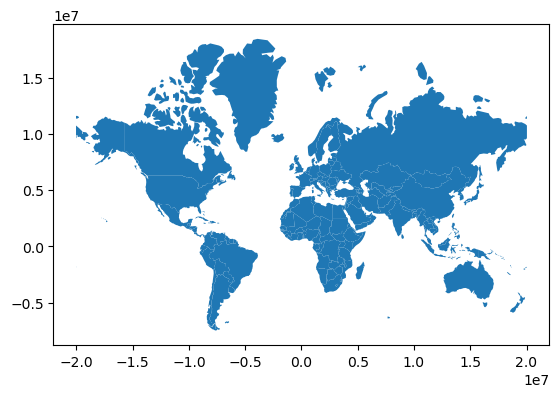

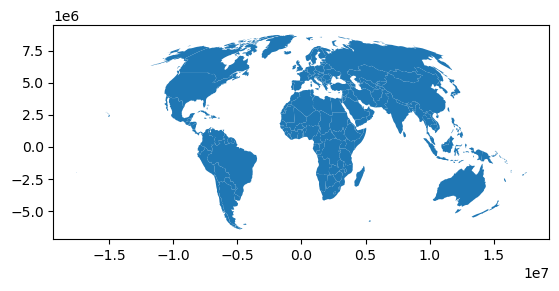

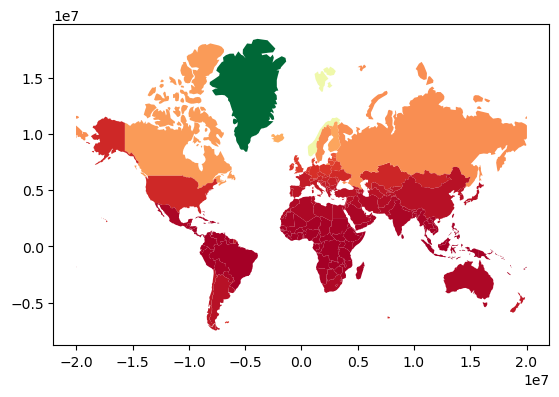

In [12]:
world.plot()
world_eq.plot()
world.plot(column = "distortion_ratio", cmap = "RdYlGn")

# 2. Draw the re-scaled map

<Axes: >

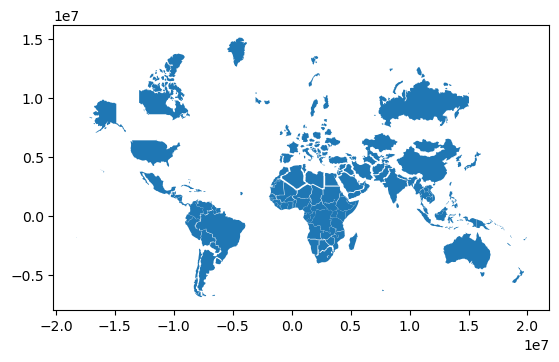

In [14]:
scaled_geoms = []

for idx, row in world.iterrows():

    geom = row.geometry
    ratio = row["distortion_ratio"]

    factor = 1.0 / np.sqrt(row["distortion_ratio"])
    cx, cy = geom.centroid.x, geom.centroid.y


    scaled = scale(
        geom,
        xfact=factor,
        yfact=factor,
        origin=(cx, cy)
    )

    scaled_geoms.append(scaled)


world_scaled = world.copy()
world_scaled["geometry"] = scaled_geoms
world_scaled.plot()

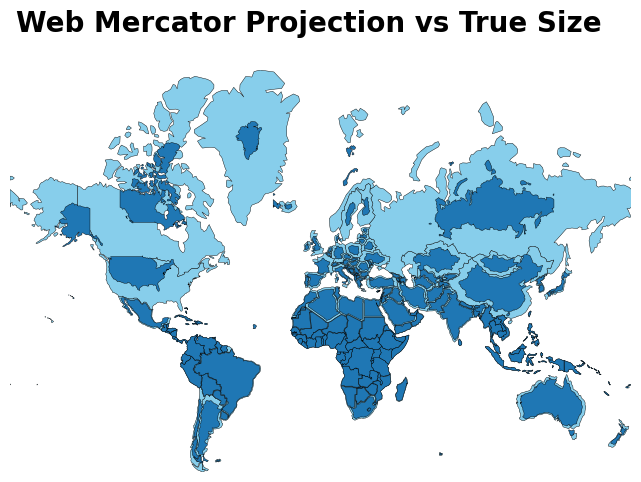

In [15]:
minx, miny, maxx, maxy = world.total_bounds

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

world.plot(ax=ax, edgecolor="k", color = "skyblue", linewidth=0.3)
world_scaled.plot(ax=ax, edgecolor="black", linewidth=0.3)

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.text(0.01, 1.15, "Web Mercator Projection vs True Size", transform=ax.transAxes,
        fontsize=20, fontweight="bold", va="top")


ax.axis("off")
plt.tight_layout()
plt.show()

# 3. Create an animation

In [41]:
# Load the file with standard quotes
world = gpd.read_file("Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Filter out Antarctica
world = world[world.ADMIN != 'Antarctica']

# Distorted (Web Mercator)
world = world.to_crs(3857)
world["area_m2"] = world.area

# Equal-area baseline (Mollweide, spherical Earth)
moll = "+proj=moll +lon_0=0 +R=6371000 +units=m +no_defs"
world_moll = world.to_crs(moll)
world["area_moll_m2"] = world_moll.area

# Area distortion ratio
world["distortion_ratio"] = world["area_m2"] / world["area_moll_m2"]

# Precompute final linear scale factor per country (for t = 1)
# Note: Ensure you have run 'import numpy as np' before this line
world["final_scale"] = 1.0 / np.sqrt(world["distortion_ratio"])

# Global bounds from original world
minx, miny, maxx, maxy = world.total_bounds

In [42]:
n_frames = 30  
foldout = 'frames' # Fixed the smart quotes here
os.makedirs(foldout, exist_ok=True)

In [43]:
for step in range(n_frames + 1):
    t = step / n_frames  # goes 0 → 1

    scaled_geoms = []

    for idx, row in world.iterrows():
        geom = row.geometry
        final_factor = row["final_scale"] # Fixed quotes

        # interpolate between 1.0 (Mercator) and final_factor (True Size)
        factor_t = 1.0 + t * (final_factor - 1.0)

        # centroid for anchoring the transformation
        cx, cy = geom.centroid.x, geom.centroid.y

        scaled = scale(
            geom,
            xfact=factor_t,
            yfact=factor_t,
            origin=(cx, cy)
        )
        scaled_geoms.append(scaled)

    # build a temporary GeoDataFrame for this frame
    world_frame = world.copy()
    world_frame["geometry"] = scaled_geoms # Fixed quotes

    # plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # optional: show original outline faintly for reference
    world.plot(ax=ax, edgecolor="k", facecolor="skyblue", linewidth=0.3) # Fixed quotes
    world_frame.plot(ax=ax, edgecolor="black", color="steelblue", linewidth=0.3) # Fixed quotes

    ax.text(0.01, 1.21, "Web Mercator Projection vs True Size", transform=ax.transAxes,
            fontsize=20, fontweight="bold", va="top") # Fixed quotes

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.axis("off") # Fixed quotes

    plt.tight_layout()
    # Fixed quotes and path separator
    plt.savefig(f"{foldout}/frame_{step:03d}.png", dpi=200) 
    plt.close(fig)
    
    # Progress indicator
    if step % 5 == 0:
        print(f"Finished frame {step}/{n_frames}")

Finished frame 0/30
Finished frame 5/30
Finished frame 10/30
Finished frame 15/30
Finished frame 20/30
Finished frame 25/30
Finished frame 30/30


In [44]:
# Save as GIF
output_gif = "projection_timelapse.gif"
iio.imwrite(output_gif, images, duration=100, loop=0) # duration is ms per frame

print(f"Saved GIF to {output_gif}")
display(HTML(f'<img src="{output_gif}" width="500" />'))

Saved GIF to projection_timelapse.gif


# 4. Design upgrade

In [35]:
# Load the images you just created ---
import os
import imageio.v3 as iio

foldout = 'frames'
files = sorted([f for f in os.listdir(foldout) if f.endswith(".png")])
images = [iio.imread(os.path.join(foldout, f)) for f in files]
# -------------------------------------------------------

# Now this will work:
output_gif = "projection_timelapse.gif"
iio.imwrite(output_gif, images, duration=100, loop=0) 
print(f"Saved GIF to {output_gif}")

Saved GIF to projection_timelapse.gif


Generating 61 frames...
Rendered frame 0/61
Rendered frame 10/61
Rendered frame 20/61
Rendered frame 30/61
Rendered frame 40/61
Rendered frame 50/61
Rendered frame 60/61
Compiling GIF...
Done! Displaying projection_timelapse_neon.gif


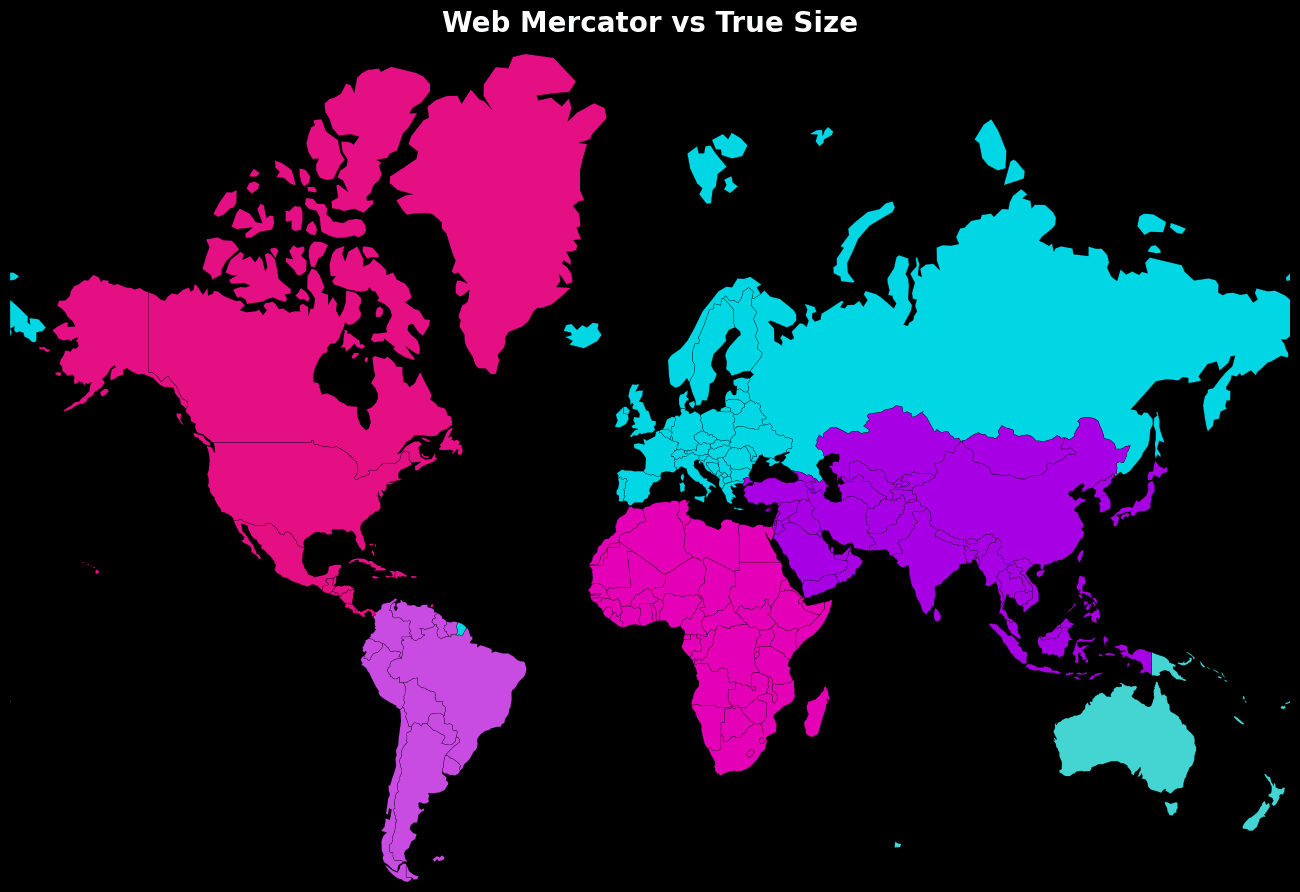

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.affinity import scale
import numpy as np
import os
import imageio.v3 as iio
from IPython.display import Image, display

# Settings
foldout = "frames_neon"
output_gif = "projection_timelapse_neon.gif"
n_frames = 30
n_cycles = 1 # How many times to repeat the pulse in the GIF
os.makedirs(foldout, exist_ok=True)

# 1. LOAD DATA
# Note: Using the path from your code. 
# If this fails, revert to "zip://ne_10m_admin_0_countries.zip"
try:
    world = gpd.read_file("Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
except:
    world = gpd.read_file("zip://ne_10m_admin_0_countries.zip")

world = world[world.ADMIN != "Antarctica"]

# 2. CALCULATE DISTORTION
world = world.to_crs(3857) # Mercator
world["area_m2"] = world.geometry.area

moll = "+proj=moll +lon_0=0 +R=6371000 +units=m +no_defs" # Mollweide
world_moll = world.to_crs(moll)
world["area_moll_m2"] = world_moll.geometry.area

world["distortion_ratio"] = world["area_m2"] / world["area_moll_m2"]
world["final_scale"] = 1.0 / np.sqrt(world["distortion_ratio"])

# 3. NEON COLORS SETUP
# ============================================
# 3. COLORS: CYBERPUNK / VAPORWAVE PALETTE
# ============================================
continent_colors = {
    "Africa":        "#FF00CC",  # Hot Magenta
    "Europe":        "#00F0FF",  # Electric Cyan
    "Asia":          "#BD00FF",  # Deep Neon Violet
    "North America": "#FF1493",  # Deep Pink
    "South America": "#E056FD",  # Soft Orchid/Light Purple
    "Oceania":       "#4DEEEA",  # Neon Turquoise
    "Seven seas (open ocean)": "#4DEEEA"
}

# Map colors...
world["neon_color"] = world["CONTINENT"].map(continent_colors).fillna("white")
# Map colors, default to white if continent not found
world["neon_color"] = world["CONTINENT"].map(continent_colors).fillna("white")
minx, miny, maxx, maxy = world.total_bounds

# 4. GENERATE FRAMES (Pulsing Loop)
# This creates a list that goes 0 -> 30 -> 0
cycle_indices = list(range(n_frames + 1)) + list(range(n_frames - 1, -1, -1))
print(f"Generating {len(cycle_indices)} frames...")

for frame_id, step in enumerate(cycle_indices):
    t = step / n_frames 

    scaled_geoms = []
    for idx, row in world.iterrows():
        geom = row.geometry
        f_final = row["final_scale"]
        
        # Interpolate scale
        f_t = 1.0 + t * (f_final - 1.0)
        
        cx, cy = geom.centroid.x, geom.centroid.y
        scaled_geoms.append(scale(geom, xfact=f_t, yfact=f_t, origin=(cx, cy)))

    world_frame = world.copy()
    world_frame["geometry"] = scaled_geoms

    # Dark Mode Plot
    fig, ax = plt.subplots(figsize=(16, 9))
    fig.patch.set_facecolor("black")
    ax.set_facecolor("black")

    world_frame.plot(
        ax=ax,
        color=world_frame["neon_color"],
        edgecolor="black",
        linewidth=0.2,
        alpha=0.9
    )

    ax.text(
        0.5, 1.02,
        "Web Mercator vs True Size",
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        color="white",
        ha="center",
        va="bottom"
    )

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.axis("off")

    plt.tight_layout()
    plt.savefig(f"{foldout}/frame_{frame_id:03d}.png", dpi=100, bbox_inches='tight', facecolor="black")
    plt.close(fig)
    
    if frame_id % 10 == 0:
        print(f"Rendered frame {frame_id}/{len(cycle_indices)}")

# 5. COMPILE GIF
print("Compiling GIF...")
files = sorted([f for f in os.listdir(foldout) if f.endswith(".png")])
images = [iio.imread(os.path.join(foldout, f)) for f in files]
iio.imwrite(output_gif, images, duration=50, loop=0)

print(f"Done! Displaying {output_gif}")
display(Image(filename=output_gif))

--- Step 1: Loading Data ---
Loaded local shapefile.
--- Step 2: Calculating Projections ---
--- Step 3: Generating Frames in 'frames_white_blue/' ---
Rendered frame 0/61
Rendered frame 10/61
Rendered frame 20/61
Rendered frame 30/61
Rendered frame 40/61
Rendered frame 50/61
Rendered frame 60/61
--- Step 4: Compiling GIF ---
Done! Saved as: projection_timelapse_white_blue.gif


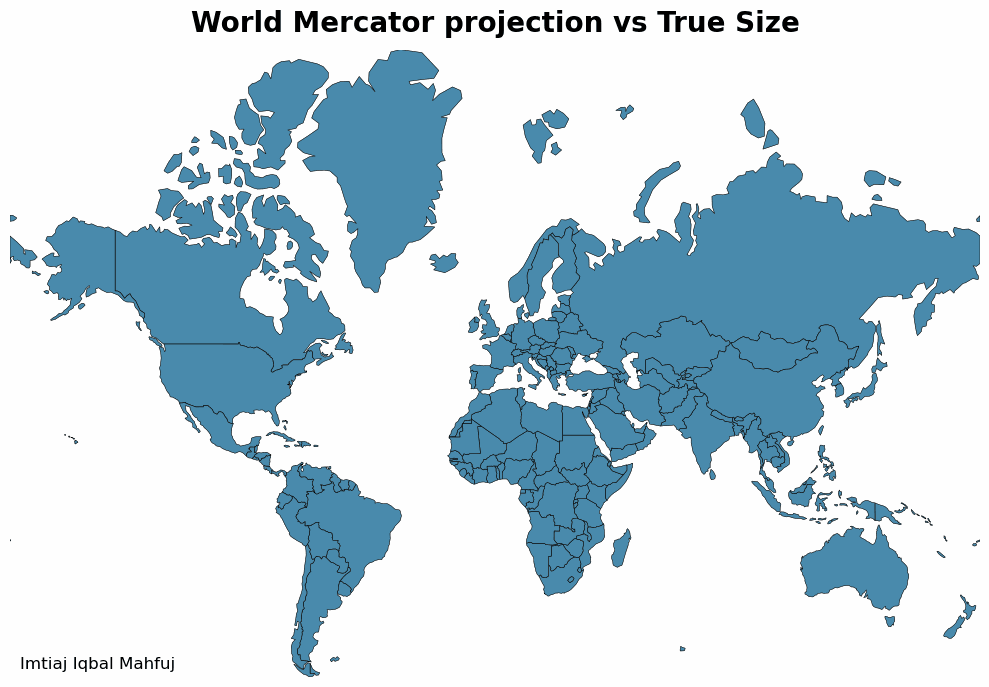

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.affinity import scale
import numpy as np
import os
import imageio.v3 as iio
from IPython.display import Image, display

# ============================================
# 1. SETTINGS
# ============================================
foldout = "frames_white_blue"
output_gif = "projection_timelapse_white_blue.gif"
n_frames = 30  # Frames per expansion cycle
os.makedirs(foldout, exist_ok=True)

print("--- Step 1: Loading Data ---")

# ============================================
# 2. LOAD DATA
# ============================================
try:
    world = gpd.read_file("Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
    print("Loaded local shapefile.")
except:
    print("Local file not found, downloading from Natural Earth...")
    world = gpd.read_file("zip://ne_10m_admin_0_countries.zip")

world = world[world.ADMIN != "Antarctica"]

# ============================================
# 3. CALCULATE DISTORTION
# ============================================
print("--- Step 2: Calculating Projections ---")

# Mercator (Distorted)
world = world.to_crs(3857)
world["area_m2"] = world.geometry.area

# Mollweide (True Size)
moll = "+proj=moll +lon_0=0 +R=6371000 +units=m +no_defs"
world_moll = world.to_crs(moll)
world["area_moll_m2"] = world_moll.geometry.area

# Calculate Ratio and Scale Factor
world["distortion_ratio"] = world["area_m2"] / world["area_moll_m2"]
world["final_scale"] = 1.0 / np.sqrt(world["distortion_ratio"])

# ============================================
# 4. DEFINE STYLE (WHITE/BLUE)
# ============================================
# A single slate-blue color similar to the reference image
slate_blue = "#4a8bad" 
world["style_color"] = slate_blue

bg_color = "#FFFFFF" # Pure White Background
border_color = "#000000" # White borders
text_color = "#000000" # Black text

minx, miny, maxx, maxy = world.total_bounds

# ============================================
# 5. GENERATE ANIMATION FRAMES
# ============================================
print(f"--- Step 3: Generating Frames in '{foldout}/' ---")

# Cycle: Small -> Big -> Small
cycle_indices = list(range(n_frames + 1)) + list(range(n_frames - 1, -1, -1))

for frame_id, step in enumerate(cycle_indices):
    
    t = step / n_frames 

    scaled_geoms = []
    for idx, row in world.iterrows():
        geom = row.geometry
        f_final = row["final_scale"]
        
        # Interpolate scale
        f_t = 1.0 + t * (f_final - 1.0)
        
        # Lock to centroid
        cx, cy = geom.centroid.x, geom.centroid.y
        scaled_geoms.append(scale(geom, xfact=f_t, yfact=f_t, origin=(cx, cy)))

    world_frame = world.copy()
    world_frame["geometry"] = scaled_geoms

    # --- PLOTTING ---
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set White Background
    fig.patch.set_facecolor(bg_color) 
    ax.set_facecolor(bg_color)

    world_frame.plot(
        ax=ax,
        color=world_frame["style_color"], # Use the single slate blue
        edgecolor=border_color, # White borders
        linewidth=0.4,
        alpha=1.0 # Solid fill (no transparency)
    )

    # Title
    ax.text(
        0.5, 1.02,
        "World Mercator projection vs True Size",
        transform=ax.transAxes,
        fontsize=20,
        color=text_color, # Black text
        ha="center",
        weight = "bold",
        va="bottom"
    )

    # Credit (optional, matches image style)
    ax.text(
        0.01, 0.01,
        "Imtiaj Iqbal Mahfuj",
        transform=ax.transAxes,
        fontsize=12,
        color=text_color,
        ha="left",
        va="bottom"
    )

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.axis("off")

    plt.tight_layout()
    
    # Save Frame with white background
    filename = f"{foldout}/frame_{frame_id:03d}.png"
    plt.savefig(filename, dpi=100, facecolor=bg_color, bbox_inches='tight')
    plt.close(fig)
    
    if frame_id % 10 == 0:
        print(f"Rendered frame {frame_id}/{len(cycle_indices)}")

# ============================================
# 6. COMPILE GIF
# ============================================
print("--- Step 4: Compiling GIF ---")

files = sorted([f for f in os.listdir(foldout) if f.endswith(".png")])
images = [iio.imread(os.path.join(foldout, f)) for f in files]

# duration=50ms is approx 20fps
iio.imwrite(output_gif, images, duration=50, loop=0)

print(f"Done! Saved as: {output_gif}")

# ============================================
# 7. DISPLAY
# ============================================
display(Image(filename=output_gif))